In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from random import randrange, uniform

In [2]:
os.chdir ('C:/Users/Harshita Prasad/Desktop/predicting bike rental counts')

In [3]:
origina_data = pd.read_csv("day.csv", sep = ',')
df = origina_data

In [4]:
df.shape

(731, 16)

In [5]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
df = df.rename(columns = {'instant':'index','dteday':'date','yr':'year','mnth':'month','weathersit':'weather',
'hum':'humidity','cnt':'count'})

In [7]:
df.columns

Index(['index', 'date', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

In [8]:
df.dtypes

index           int64
date           object
season          int64
year            int64
month           int64
holiday         int64
weekday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [9]:
df.describe()

,index,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
df['count'].dtypes

dtype('int64')

In [11]:
df = df.drop(['casual','registered','index','date'],axis=1)

In [12]:
df.shape

(731, 12)

In [13]:
numerical_var = ['temp', 'atemp', 'humidity', 'windspeed', 'count']

In [14]:
categorical_varrical_var=['season', 'year', 'month', 'holiday', 'weekday', 'workingday','weather']

In [15]:
df.dtypes

season          int64
year            int64
month           int64
holiday         int64
weekday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
count           int64
dtype: object

In [16]:
df['season'] = df['season'].astype(object)
df['year'] = df['year'].astype(object)
df['month'] = df['month'].astype(object)
df['holiday'] = df['holiday'].astype(object)
df['weekday'] = df['weekday'].astype(object)
df['workingday'] = df['workingday'].astype(object)
df['weather'] = df['weather'].astype(object)

Text(0.5, 0.98, 'Pairwise plot of all numerical variables')

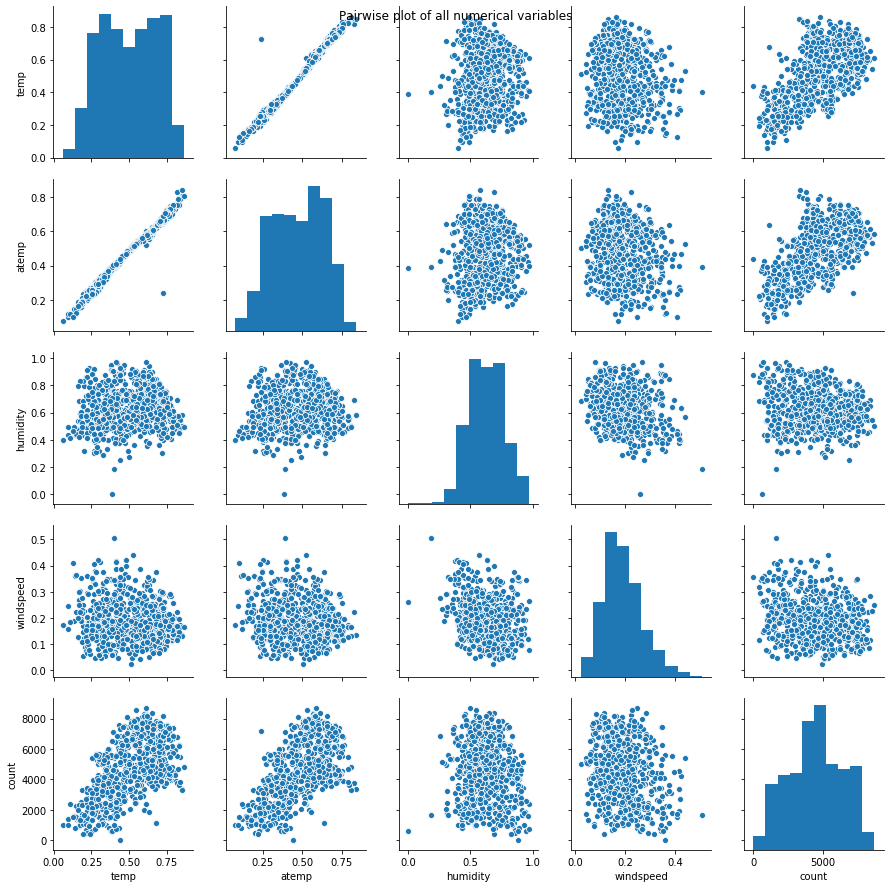

In [17]:
#Pairplot for all numerical variables
pairwise_plot = sns.pairplot(data=df[numerical_var],kind='scatter')
pairwise_plot.fig.suptitle('Pairwise plot of all numerical variables')

In [18]:
Missing_val = df.isnull().sum()
Missing_val

season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

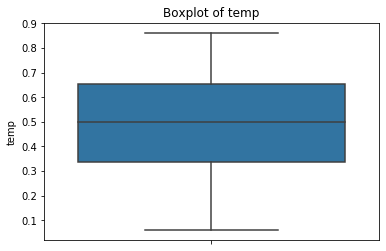

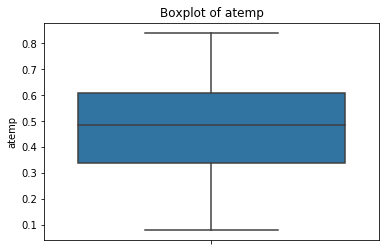

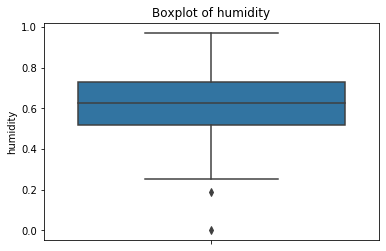

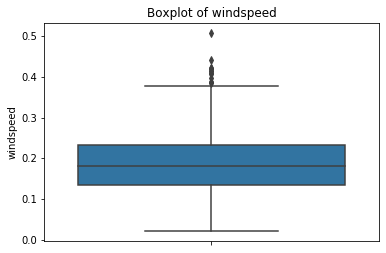

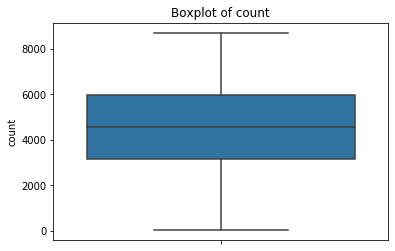

In [19]:
#Box plot
for i in numerical_var:
    sns.boxplot(y=i,data=df)
    plt.title('Boxplot of '+i)
    plt.savefig('bp'+str(i)+'.png')
    plt.show()

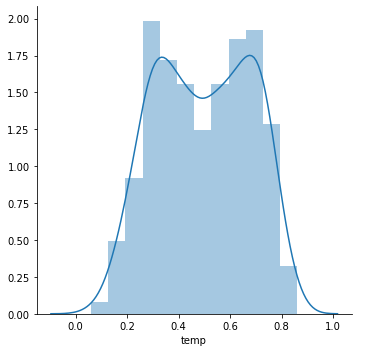

In [20]:
# Univariate Analysis
# temperature
sns.FacetGrid(df , height = 5).map(sns.distplot,'temp').add_legend()

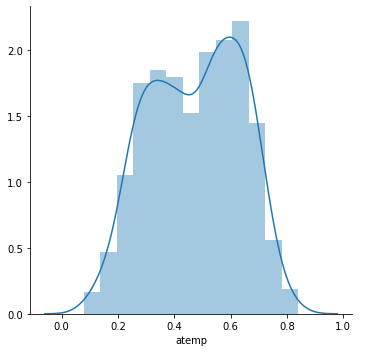

In [21]:
#atemp
sns.FacetGrid(df , height = 5).map(sns.distplot,'atemp').add_legend()

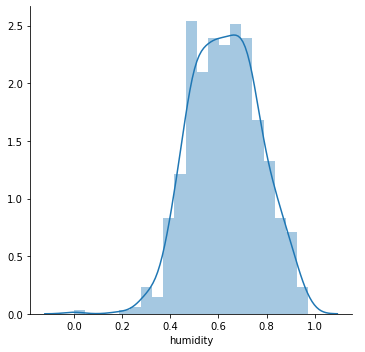

In [22]:
# humidity
sns.FacetGrid(df , height = 5).map(sns.distplot,'humidity').add_legend()

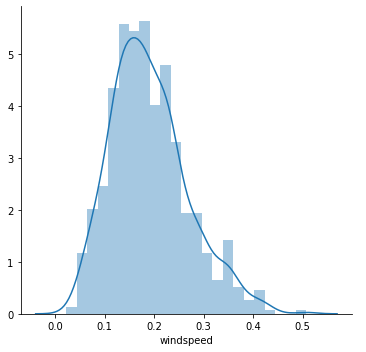

In [23]:
# windspeed
sns.FacetGrid(df , height = 5).map(sns.distplot,'windspeed').add_legend()

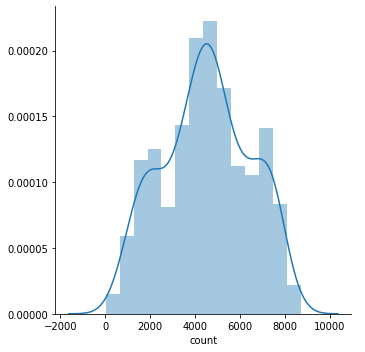

In [24]:
# count
sns.FacetGrid(df , height = 5).map(sns.distplot,'count').add_legend()

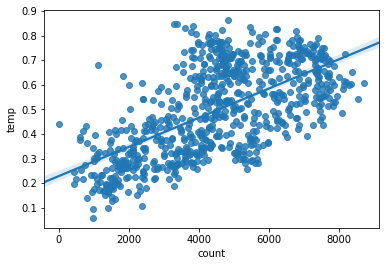

In [25]:
#impact of continous variables on target variable
#count vs temperature
sns.regplot(x=df["count"], y=df["temp"])

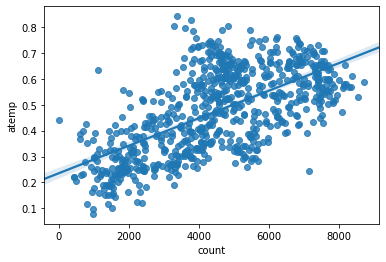

In [26]:
#count vs atemp
sns.regplot(x=df["count"], y=df["atemp"])

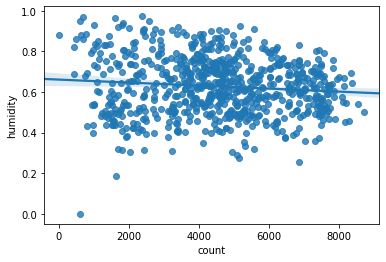

In [27]:
#count vs humidity
sns.regplot(x=df["count"], y=df["humidity"])

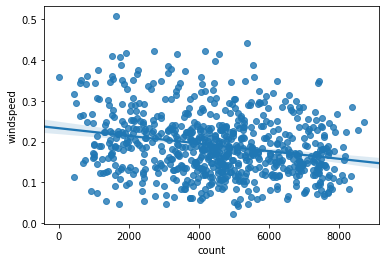

In [28]:
#count vs windspeed
sns.regplot(x=df["count"], y=df["windspeed"])

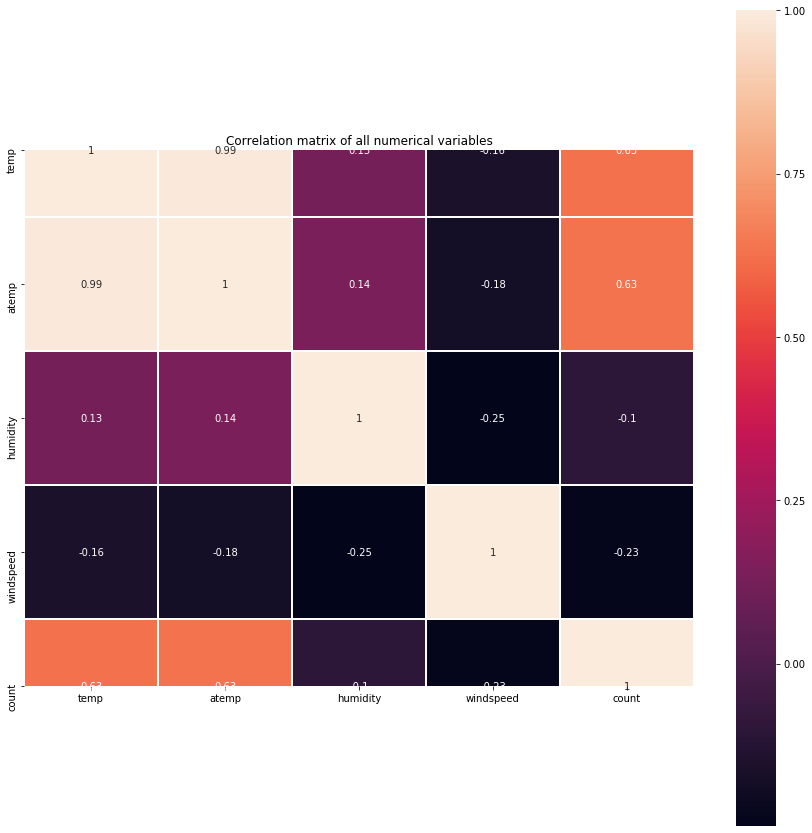

In [29]:
# Correlation matrix continuous variables
plt.figure(figsize=(15,15))
_ = sns.heatmap(df[['temp','atemp','humidity','windspeed','count']].corr(),linewidths=0.5,linecolor='w',square=True,annot=True)
plt.title('Correlation matrix of all numerical variables')
plt.savefig('corrmap.png')
plt.show()

In [30]:
#chi square analysis
from scipy.stats import chi2_contingency

In [31]:
for i in categorical_var:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['count'], df[i]))
    print(p)

season
0.5440596338517547
year
0.367724209978971
month
0.49177634472851
holiday
0.6781463865579803
weekday
0.4102128310764939
workingday
0.45435914436398794
weather
0.6407439686474243


In [32]:
for i in categorical_var:
    for j in categorical_var:
        if(i != j):
            chi2, p, dof, ex = chi2_contingency(pd.crosstab(df[i], df[j]))
            if(p < 0.05):
                print(i,"and",j,"are dependent on each other with",p,'----Remove')
            else:
                print(i,"and",j,"are independent on each other with",p,'----Keep')

season and year are independent on each other with 0.9999288084245916 ----Keep
season and month are dependent on each other with 0.0 ----Remove
season and holiday are independent on each other with 0.6831687073042003 ----Keep
season and weekday are independent on each other with 0.9999999999988407 ----Keep
season and workingday are independent on each other with 0.8865568364019545 ----Keep
season and weather are dependent on each other with 0.021179301044733697 ----Remove
year and season are independent on each other with 0.9999288084245916 ----Keep
year and month are independent on each other with 0.9999999999999892 ----Keep
year and holiday are independent on each other with 0.9949247279855291 ----Keep
year and weekday are independent on each other with 0.9999995848511959 ----Keep
year and workingday are independent on each other with 0.9799434134248637 ----Keep
year and weather are independent on each other with 0.12737941480418666 ----Keep
month and season are dependent on each oth

In [33]:
df = df.drop(['atemp','holiday','weekday','workingday'],axis = 1)

In [34]:
df.shape

(731, 8)

In [35]:
df.columns

Index(['season', 'year', 'month', 'weather', 'temp', 'humidity', 'windspeed',
       'count'],
      dtype='object')

In [36]:
# numerical variable
num_var = ['temp','humidity', 'windspeed', 'count']
# Categorical variables
cat_var = ['season', 'year', 'month','weather']

In [37]:
#Nomalisation
df['new_count'] = (df['count'] - min(df['count']))/(max(df['count']) - min(df['count']))

In [38]:
df.columns

Index(['season', 'year', 'month', 'weather', 'temp', 'humidity', 'windspeed',
       'count', 'new_count'],
      dtype='object')

In [39]:
df = df.drop(['count'],axis = 1)

In [40]:
df.columns

Index(['season', 'year', 'month', 'weather', 'temp', 'humidity', 'windspeed',
       'new_count'],
      dtype='object')

In [41]:
##Decision tree
#Divide data into train and test
train, test = train_test_split(df, test_size=0.2)

In [42]:
train.shape

(584, 8)

In [43]:
#Decision tree for regression
DT_fit = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:7], train.iloc[:,7])

In [44]:
#Apply model on test data
DT_predictions = DT_fit.predict(test.iloc[:,0:7])

In [45]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

In [46]:
MAPE(test.iloc[:,7], DT_predictions)      #26.55

26.553863886701063

In [47]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

In [48]:
RF_model = RandomForestRegressor(n_estimators = 100).fit(train.iloc[:,0:7], train.iloc[:,7])

In [49]:
RF_Predictions = RF_model.predict(test.iloc[:,0:7])

In [50]:
MAPE(test.iloc[:,7], RF_Predictions)  #15.11

15.113860227684942

In [54]:
RF_model1 = RandomForestRegressor(n_estimators = 500).fit(train.iloc[:,0:7], train.iloc[:,7])

In [55]:
RF_Predictions1 = RF_model1.predict(test.iloc[:,0:7])

In [56]:
MAPE(test.iloc[:,7], RF_Predictions1)  #14.81

14.810210031456478

In [57]:
#Linear Regression
import statsmodels.api as sm

In [61]:
# Train the model using the training sets
LR_model = sm.OLS(train.iloc[:,7], train.iloc[:,0:7].astype(float)).fit()

In [63]:
LR_predictions = LR_model.predict(test.iloc[:,0:7]) 

In [64]:
#Calculate MAPE
MAPE(test.iloc[:,7], LR_predictions) #21.24

21.23800739151658